In [1]:
import pandas as pd

df_original = pd.read_csv('topRatedMovies.csv', delimiter=';', converters={
    "genres": lambda x: x.split("|"),
    "cast": lambda x: x.split("|")
})

df_original

,tmdb_id,title,year,runtime,rating,cast,genres
0,238,The Godfather,1972,175,87,"[Al Pacino, Marlon Brando, James Caan, Richard...","[Drama, Crime]"
1,278,The Shawshank Redemption,1994,142,87,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...","[Drama, Crime]"
2,240,The Godfather Part II,1974,202,86,"[Al Pacino, Robert Duvall, Diane Keaton, Rober...","[Drama, Crime]"
3,19404,Dilwale Dulhania Le Jayenge,1995,190,86,"[Shah Rukh Khan, Kajol, Amrish Puri, Anupam Kh...","[Comedy, Drama, Romance]"
4,424,Schindler's List,1993,195,86,"[Liam Neeson, Ben Kingsley, Ralph Fiennes, Car...","[Drama, History, War]"
...,...,...,...,...,...,...,...
995,63,Twelve Monkeys,1995,129,76,"[Bruce Willis, Madeleine Stowe, Brad Pitt, Chr...","[Science_Fiction, Thriller, Mystery]"
996,391698,The Beatles: Eight Days a Week - The Touring Y...,2016,106,76,"[Paul McCartney, Ringo Starr, John Lennon, Geo...","[Documentary, Music]"
997,228205,The Longest Ride,2015,128,76,"[Scott Eastwood, Britt Robertson, Lolita David...","[Drama, Romance]"
998,9912,The World's Fastest Indian,2005,127,76,"[Anthony Hopkins, Walton Goggins, Diane Ladd, ...","[Drama, Adventure, History]"


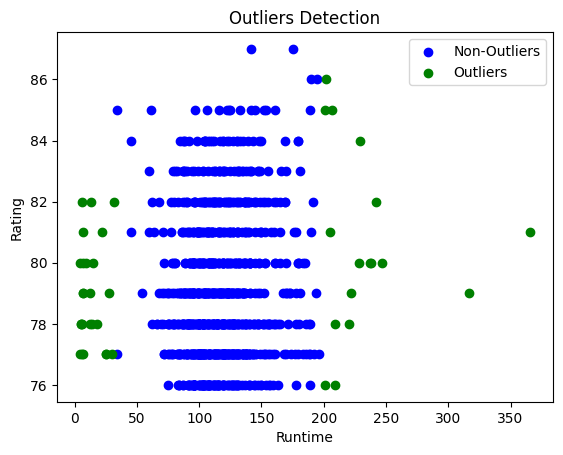

In [2]:
import matplotlib.pyplot as plt

# Always base the outlier detection on the original data so that new outliers won't be detected on multiple runs
df = df_original.copy()

# Select the columns to perform the clustering on
df_cluster = df[['runtime', 'rating']]

# Set the threshold for outlier detection
threshold = 2

# Calculate the IQR
Q1 = df_cluster.quantile(0.25)
Q3 = df_cluster.quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers based on the threshold
outliers = ((df_cluster < (Q1 - threshold * IQR)) | (df_cluster > (Q3 + threshold * IQR))).any(axis=1)
outlier_ids = df.loc[outliers, 'tmdb_id']

# Plot the outliers
plt.scatter(df_cluster.loc[~outliers, 'runtime'], df_cluster.loc[~outliers, 'rating'], c='blue', label='Non-Outliers')
plt.scatter(df_cluster.loc[outliers, 'runtime'], df_cluster.loc[outliers, 'rating'], c='green', label='Outliers')

plt.xlabel('Runtime')
plt.ylabel('Rating')
plt.title('Outliers Detection')
plt.legend()
plt.show()

In [3]:
# Drop the rows with outlier IDs
df = df[~df['tmdb_id'].isin(outlier_ids)].reset_index(drop=True)

df

,tmdb_id,title,year,runtime,rating,cast,genres
0,238,The Godfather,1972,175,87,"[Al Pacino, Marlon Brando, James Caan, Richard...","[Drama, Crime]"
1,278,The Shawshank Redemption,1994,142,87,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...","[Drama, Crime]"
2,19404,Dilwale Dulhania Le Jayenge,1995,190,86,"[Shah Rukh Khan, Kajol, Amrish Puri, Anupam Kh...","[Comedy, Drama, Romance]"
3,424,Schindler's List,1993,195,86,"[Liam Neeson, Ben Kingsley, Ralph Fiennes, Car...","[Drama, History, War]"
4,129,Spirited Away,2001,125,85,"[Rumi Hiiragi, Miyu Irino, Mari Natsuki, Takas...","[Animation, Family, Fantasy]"
...,...,...,...,...,...,...,...
953,63,Twelve Monkeys,1995,129,76,"[Bruce Willis, Madeleine Stowe, Brad Pitt, Chr...","[Science_Fiction, Thriller, Mystery]"
954,391698,The Beatles: Eight Days a Week - The Touring Y...,2016,106,76,"[Paul McCartney, Ringo Starr, John Lennon, Geo...","[Documentary, Music]"
955,228205,The Longest Ride,2015,128,76,"[Scott Eastwood, Britt Robertson, Lolita David...","[Drama, Romance]"
956,9912,The World's Fastest Indian,2005,127,76,"[Anthony Hopkins, Walton Goggins, Diane Ladd, ...","[Drama, Adventure, History]"


In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
normalized = scaler.fit_transform(df[['rating', 'runtime']])

df

,tmdb_id,title,year,runtime,rating,cast,genres
0,238,The Godfather,1972,175,87,"[Al Pacino, Marlon Brando, James Caan, Richard...","[Drama, Crime]"
1,278,The Shawshank Redemption,1994,142,87,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...","[Drama, Crime]"
2,19404,Dilwale Dulhania Le Jayenge,1995,190,86,"[Shah Rukh Khan, Kajol, Amrish Puri, Anupam Kh...","[Comedy, Drama, Romance]"
3,424,Schindler's List,1993,195,86,"[Liam Neeson, Ben Kingsley, Ralph Fiennes, Car...","[Drama, History, War]"
4,129,Spirited Away,2001,125,85,"[Rumi Hiiragi, Miyu Irino, Mari Natsuki, Takas...","[Animation, Family, Fantasy]"
...,...,...,...,...,...,...,...
953,63,Twelve Monkeys,1995,129,76,"[Bruce Willis, Madeleine Stowe, Brad Pitt, Chr...","[Science_Fiction, Thriller, Mystery]"
954,391698,The Beatles: Eight Days a Week - The Touring Y...,2016,106,76,"[Paul McCartney, Ringo Starr, John Lennon, Geo...","[Documentary, Music]"
955,228205,The Longest Ride,2015,128,76,"[Scott Eastwood, Britt Robertson, Lolita David...","[Drama, Romance]"
956,9912,The World's Fastest Indian,2005,127,76,"[Anthony Hopkins, Walton Goggins, Diane Ladd, ...","[Drama, Adventure, History]"


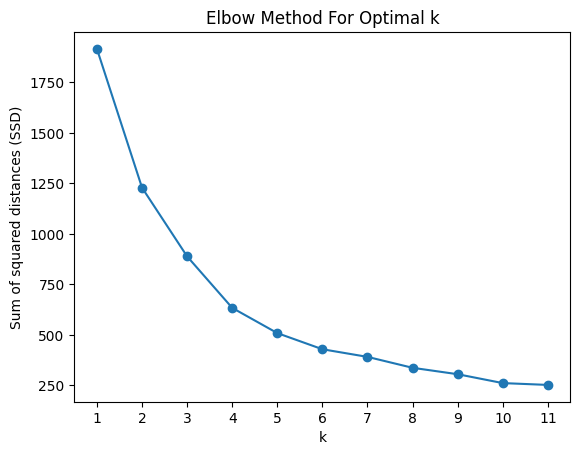

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate sum of squared distances
ssd = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k, n_init='auto')
    km = km.fit(normalized)
    ssd.append(km.inertia_)
    
# Plot the elbow
plt.plot(K, ssd, 'o-')
plt.xlabel('k')
plt.xticks(K)
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.show()

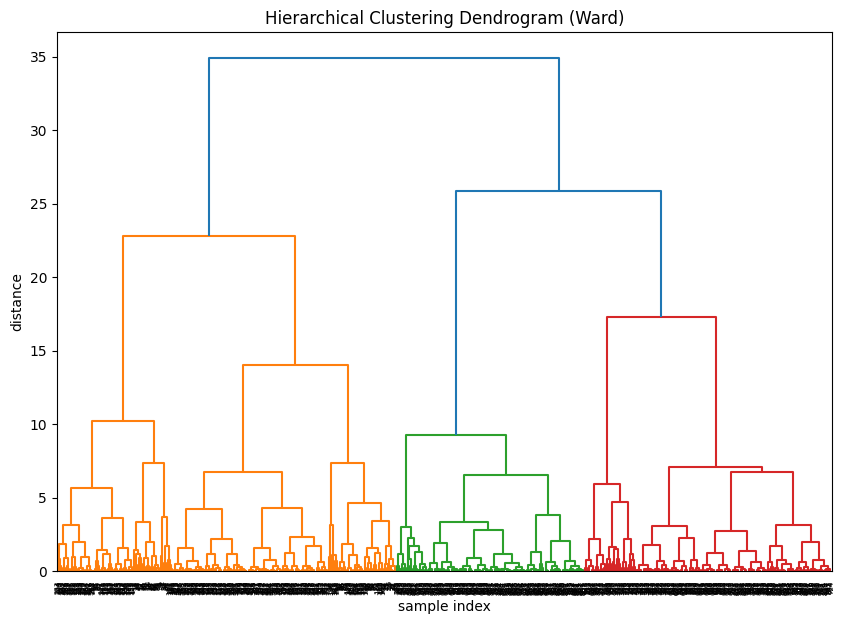

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Create a linkage matrix using ward's method
linkage_matrix = linkage(normalized, 'ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

In [7]:
# Perform clustering
n_clusters = 5

kmeans = KMeans(n_clusters, n_init='auto')
predictions = kmeans.fit_predict(normalized)

# Add the cluster column to the original DataFrame
df['Cluster'] = predictions

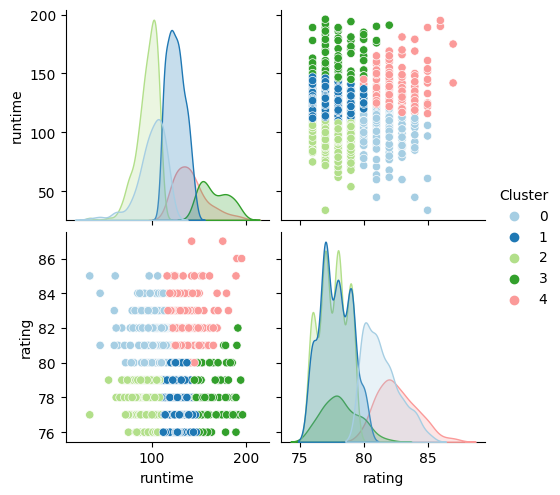

In [8]:
import seaborn as sns

sns.pairplot(df, vars=df_cluster, hue='Cluster', palette='Paired')

In [9]:
#
print("***************************************")
print("runtime Data")
print("***************************************")
print(df['runtime'].describe())
print("\n***************************************")
print("Rating Data")
print("***************************************")
print(df['rating'].describe())
print("***************************************")


***************************************
runtime Data
***************************************
count    958.000000
mean     116.966597
std       25.666760
min       34.000000
25%      100.000000
50%      114.000000
75%      131.000000
max      196.000000
Name: runtime, dtype: float64

***************************************
Rating Data
***************************************
count    958.000000
mean      79.070981
std        2.325896
min       76.000000
25%       77.000000
50%       79.000000
75%       81.000000
max       87.000000
Name: rating, dtype: float64
***************************************


# Hypotestestning

## Kontrollera om runtime är normalfördelad

H0 = Data är normalfördelat  
H1 = Data är inte normalfördelat

Resultat: Eftersom p-värdet är mindre än 0.05 så är datat inte normalfördelat.
Statistic: 0.9778248071670532 P-value: 6.601657415172824e-11


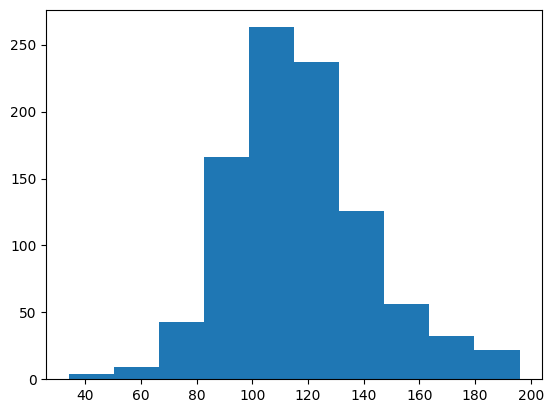

In [10]:
# Check if the data is normally distributed
from scipy.stats import shapiro

alpha = 0.05

stat, p = shapiro(df['runtime'])

if p < alpha:
    print('Resultat: Eftersom p-värdet är mindre än 0.05 så är datat inte normalfördelat.')
else:
    print('Resultat: Eftersom p-värdet är större eller lika med 0.05 så kan vi acceptera H0 och datat är därför normalfördelat.')

print("Statistic:", stat, "P-value:", p)

plt.hist(df['runtime'])
plt.show()

In [11]:
# Randomly sort the DataFrame so that different movies around the median runtime
# isn't scewed towards a higher or lower rating in the next runtime sort step
df = df.sample(frac=1).reset_index(drop=True)

# Sort the DataFrame by runtime
df = df.sort_values(by='runtime').reset_index(drop=True)

# Split the DataFrame into 2 halves
df_runtime_short = df.iloc[:len(df) // 2]
df_runtime_long = df.iloc[len(df) // 2:].reset_index(drop=True)

#df_runtime_short
#df_runtime_long

In [12]:
# Mean rating for both halves
print("Mean Rating for Short Runtime", df_runtime_short['rating'].mean())
print("Mean Rating for Long Runtime", df_runtime_long['rating'].mean())

Mean Rating for Short Runtime 78.8893528183716
Mean Rating for Long Runtime 79.25260960334029


H0 = Medelbetyget för filmerna i den kortare halvan är lägre än medelbetyget för den andra halvan  
H1 = Medelbetyget för filmerna i den längre halvan är lägre än medelbetyget för den andra halvan

In [13]:
# Kruskal-Wallis test
from scipy.stats import kruskal

alpha = 0.05
stat, p = kruskal(df_runtime_short['rating'], df_runtime_long['rating'])

if p < alpha:
    print('Resultat: Eftersom p-värdet är mindre än 0.05 så förkastar vi H0 och det finns ingen skillnad i betyg mellan filmerna.')
else:
    print('Resultat: Eftersom p-värdet är större eller lika med 0.05 så kan vi acceptera H0 och det finns en skillnad i betyg mellan filmerna.')

print("Statistic:", stat, "P-value:", p)

Resultat: Eftersom p-värdet är större eller lika med 0.05 så kan vi acceptera H0 och det finns en skillnad i betyg mellan filmerna.
Statistic: 3.6262491053428745 P-value: 0.0568748626956997
